In [1]:
# import pandas
import pandas as pd

# import statsmodels.api as sm
import statsmodels.api as sm

# import matplotlib
import matplotlib.pyplot as plt


In [2]:
# load data
data = sm.datasets.co2.load_pandas()
co2 = data.data

* print top 5 rows

In [8]:
co2.tail()

,co2
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3
2001-12-29,371.5


* Resample timeseries using monthly averages and store the new timeseries as a Series `y`

In [42]:
y = co2.groupby([co2.index.year,co2.index.month]).mean()
y = y.reset_index(level=[0,1])
y

,level_0,level_1,co2
0,1958,3,316.100000
1,1958,4,317.200000
2,1958,5,317.433333
3,1958,6,NaN
4,1958,7,315.625000
...,...,...,...
521,2001,8,369.425000
522,2001,9,367.880000
523,2001,10,368.050000
524,2001,11,369.375000


* print top 5 rows of 'y'

In [43]:
y.head()

,level_0,level_1,co2
0,1958,3,316.100000
1,1958,4,317.200000
2,1958,5,317.433333
3,1958,6,NaN
4,1958,7,315.625000


* check the missing values

In [44]:
y.co2.isna().sum()/len(y.co2)*100

0.9505703422053232

* replace missing values with last available value
    - if Feb 2010 is missing, use value from Jan 2010.

In [45]:
import numpy as np
for i in range(len(y.co2)):
    if ~(y.co2[i]>=0):
        print(y.co2[i])
        y.co2[i] = y.co2[i-1]
y.co2.isna().sum()/len(y.co2)*100

nan
nan
nan
nan
nan


0.0

* plot timeseries `y`

In [48]:
year = 1958
m = 3
time = []
for i in range(len(y)):
    time.append(f'{year}-{m}')
    m += 1
    if m > 12:
        m = 1
        year += 1

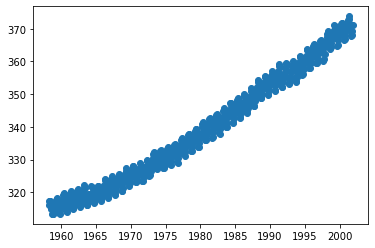

In [49]:
y['month'] = pd.to_datetime(time, format='%Y-%m')
plt.scatter(y.month,y.co2)
plt.show()

* Apply and plot:
    - additive seasonal decomposition
    - multiplicative seasonal decomposition

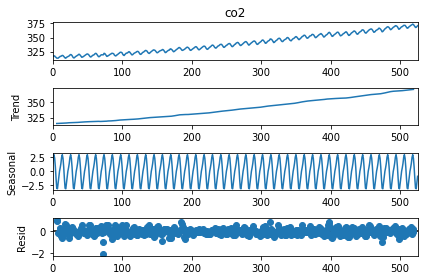

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(y.co2, model='additive', freq=12)
result.plot()
plt.show()

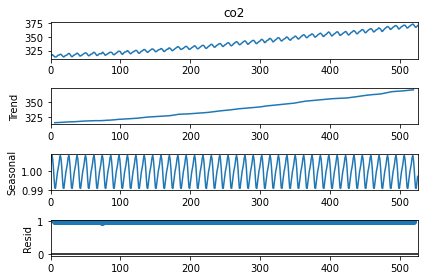

In [56]:
result = seasonal_decompose(y.co2, model='multiplicative', freq=12)
result.plot()
plt.show()